In [1]:
import os
os.chdir("../../")

In [2]:
from auto_call_strategy import *
from back_tester import BackTester
from utils.book import Book
from datetime import datetime
from utils.instruments import AutoCallInstrument
from utils.ledger import ProductLedger
from utils.market_data_reader import MarketDataReader

from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd

In [3]:
data = MarketDataReader.load_market_data("000998", datetime(2021, 5, 10), datetime(2021, 8, 10))
strategy1 = AutoCallRelativeHedgeStrategy(0.03, '1d')
strategy2 = AutoCallEODHedge()
# strategy2 = AutoCallRelativeHedgeStrategy(0.02, '1d')
# strategy3 = AutoCallRelativeHedgeStrategy(0.03, '1d')
book = Book.init_book(
    ProductLedger("", AutoCallInstrument("000998", data), 1)
)

Start loading data


In [5]:
result1 = BackTester(book).run(strategy1)
result2 = BackTester(book).run(strategy2)
#result3 = BackTester(book).run(strategy3)

Starting to run backtest AUTO_CALL_RELATIVE_HEDGE_3.0%
Starting to run backtest AUTO_CALL_EOD_HEDGE


In [6]:
ts = list(result1.index.strftime("%Y-%m-%d %H:%M:%S"))
xticks = list(range(0, len(ts), 1920))

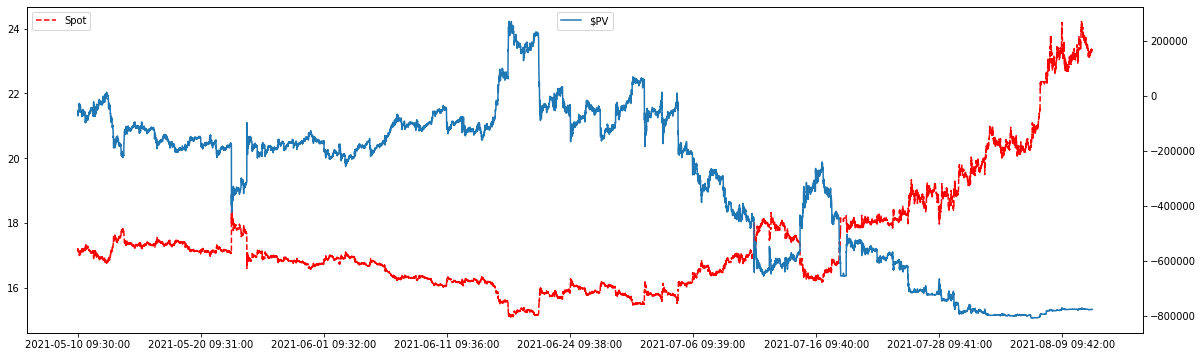

In [7]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
# result1.index = result1.index.strftime("%Y-%m-%d %H:%S")
# ax.set_xticks(range(len(result1.index)))
# ax.set_xticklabels(result1.index.strftime("%Y-%m-%d %H:%S"))
ax.plot(ts, result1['close'], linestyle='--', color='r', label='Spot')
ax.set_xticks(xticks)
ax2 = ax.twinx()
ax2.plot(ts, result1['pv'], '-', label='$PV')
ax2.set_xticks(xticks)
ax2.legend(loc=9)
ax.legend(loc=0)

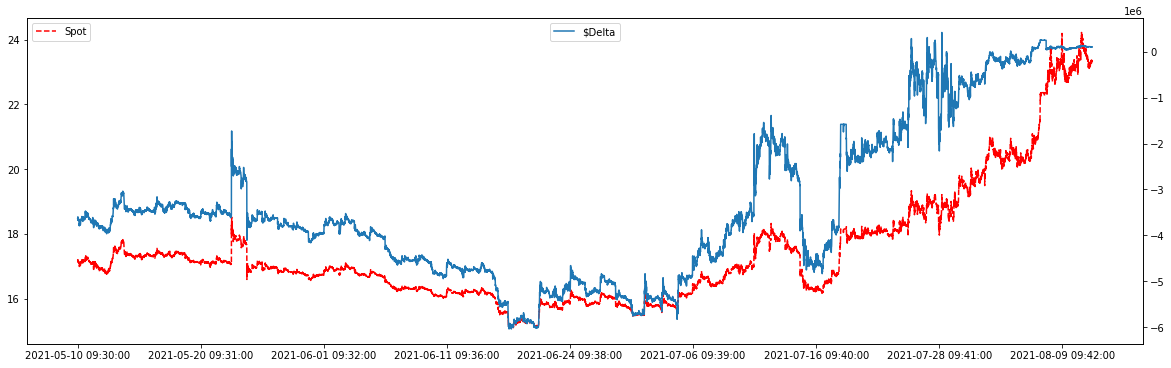

In [8]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
# result1.index = result1.index.strftime("%Y-%m-%d %H:%S")
# ax.set_xticks(range(len(result1.index)))
# ax.set_xticklabels(result1.index.strftime("%Y-%m-%d %H:%S"))
ax.plot(ts, result1['close'], linestyle='--', color='r', label='Spot')
ax.set_xticks(xticks)
ax2 = ax.twinx()
ax2.plot(ts, result1['delta'], '-', label='$Delta')
ax2.set_xticks(xticks)
ax2.legend(loc=9)
ax.legend(loc=0)

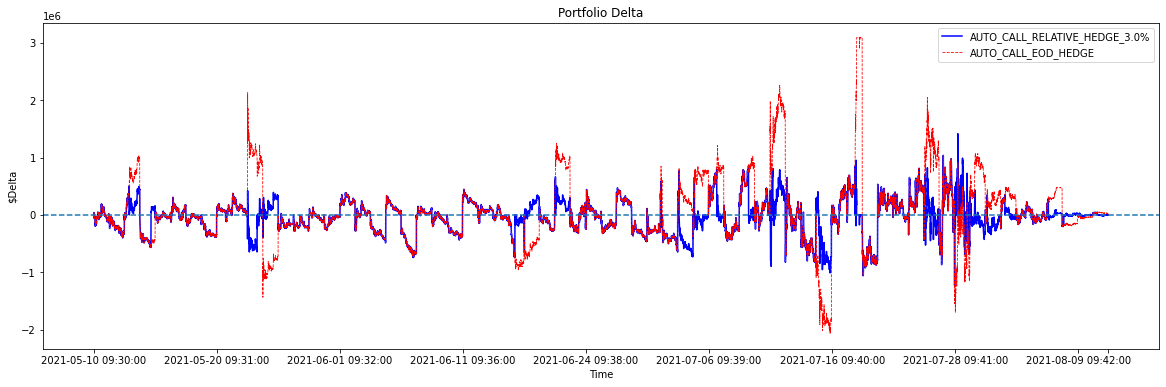

In [9]:
fig = plt.figure(figsize=(20, 6))
plt.title("Portfolio Delta")
plt.plot(ts, result1[strategy1.tag_delta()] ,'b', label=str(strategy1))
plt.plot(ts, result2[strategy2.tag_delta()], 'r', linewidth=0.8, linestyle='--', label=str(strategy2))
#plt.plot(ts, result3[strategy3.tag_delta()], 'g', label=str(strategy3))
plt.axhline(0, linestyle='--')
xlabels = [ts[i] for i in xticks]
xticks.append(len(ts))
xlabels.append(ts[-1])
plt.xticks(xticks)
# plt.xticklabels(xlabels)
plt.xlabel("Time")
plt.ylabel("$Delta")
plt.legend()

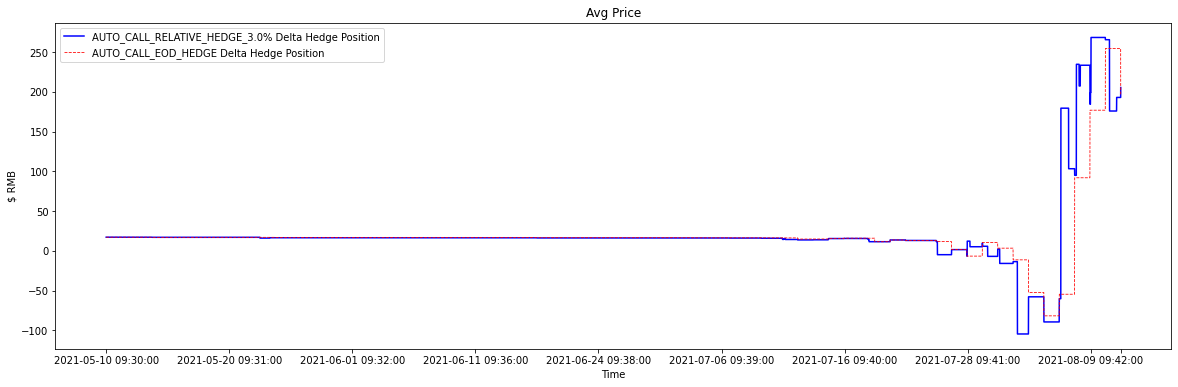

In [10]:
plt.figure(figsize=(20, 6))
plt.title("Avg Price")
plt.plot(ts, result1[strategy1.tag_hedge_avg_price()] ,'b', label = strategy1.tag_hedge_position())
plt.plot(ts, result2[strategy2.tag_hedge_avg_price()], 'r', linewidth=0.8, linestyle='--', label = strategy2.tag_hedge_position())
#plt.plot(ts, result3[strategy3.tag_hedge_position()], 'g', label = strategy3.tag_hedge_position())
plt.xlabel("Time")
plt.ylabel("$ RMB")
plt.xticks(xticks)
plt.legend()

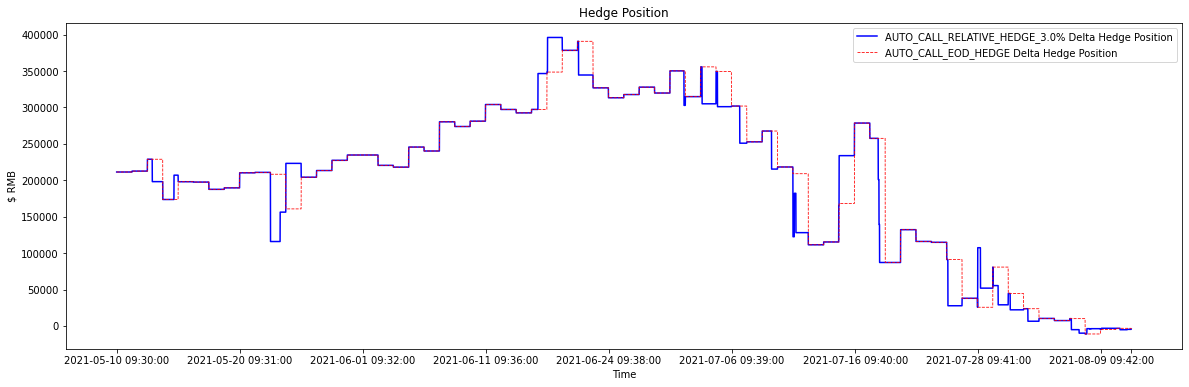

In [11]:
plt.figure(figsize=(20, 6))
plt.title("Hedge Position")
plt.plot(ts, result1[strategy1.tag_hedge_position()] ,'b', label = strategy1.tag_hedge_position())
plt.plot(ts, result2[strategy2.tag_hedge_position()], 'r', linewidth=0.8, linestyle='--', label = strategy2.tag_hedge_position())
#plt.plot(ts, result3[strategy3.tag_hedge_position()], 'g', label = strategy3.tag_hedge_position())
plt.xlabel("Time")
plt.ylabel("$ RMB")
plt.xticks(xticks)
plt.legend()

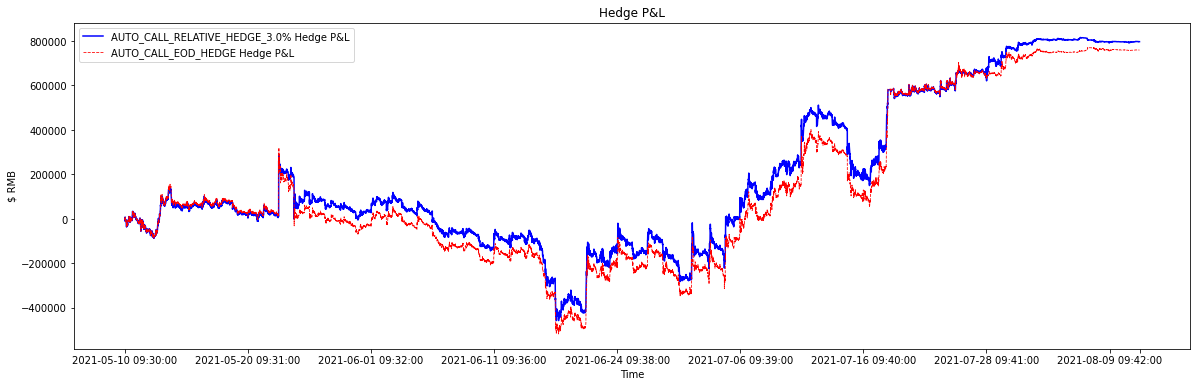

In [12]:
plt.figure(figsize=(20, 6))
plt.title("Hedge P&L")
plt.plot(ts, result1[strategy1.tag_hedge_pnl()] ,'b', label = strategy1.tag_hedge_pnl())
plt.plot(ts, result2[strategy2.tag_hedge_pnl()], 'r', linewidth=0.8, linestyle='--', label = strategy2.tag_hedge_pnl())
#plt.plot(ts, result3[strategy3.tag_pv()], 'g', label = strategy3.tag_pv())
plt.xlabel("Time")
plt.ylabel("$ RMB")
plt.legend()
plt.xticks(xticks);

In [13]:
excess_rtn = result1[strategy1.tag_hedge_pnl()] - result2[strategy2.tag_hedge_pnl()]

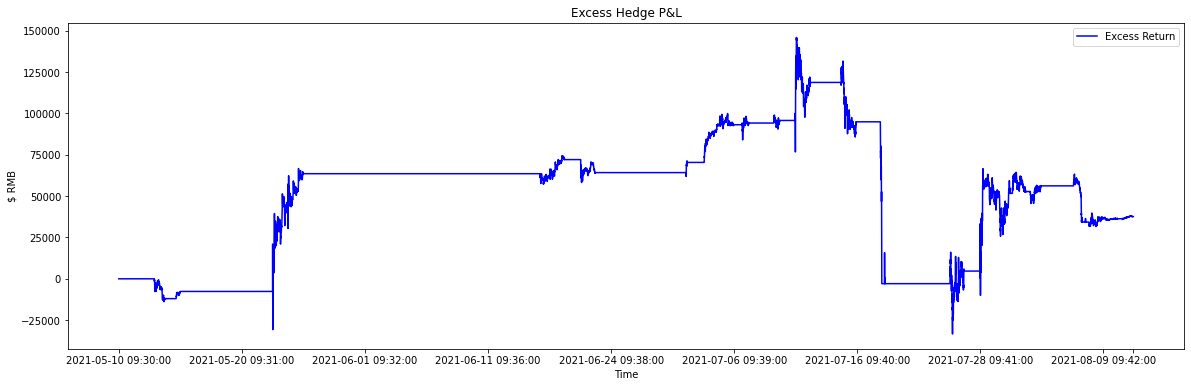

In [14]:
plt.figure(figsize=(20, 6))
plt.title("Excess Hedge P&L")
plt.plot(ts, excess_rtn ,'b', label = "Excess Return")
# plt.plot(ts, result2[strategy2.tag_hedge_pnl()], 'r', linewidth=0.8, linestyle='--', label = strategy2.tag_hedge_pnl())
#plt.plot(ts, result3[strategy3.tag_pv()], 'g', label = strategy3.tag_pv())
plt.xlabel("Time")
plt.ylabel("$ RMB")
plt.legend()
plt.xticks(xticks);

In [15]:
result1['Total Pnl'] = result1['pv'] + result1[strategy1.tag_hedge_pnl()] - result1['pv'][0]
result2['Total Pnl'] = result2['pv'] + result2[strategy2.tag_hedge_pnl()] - result2['pv'][0]

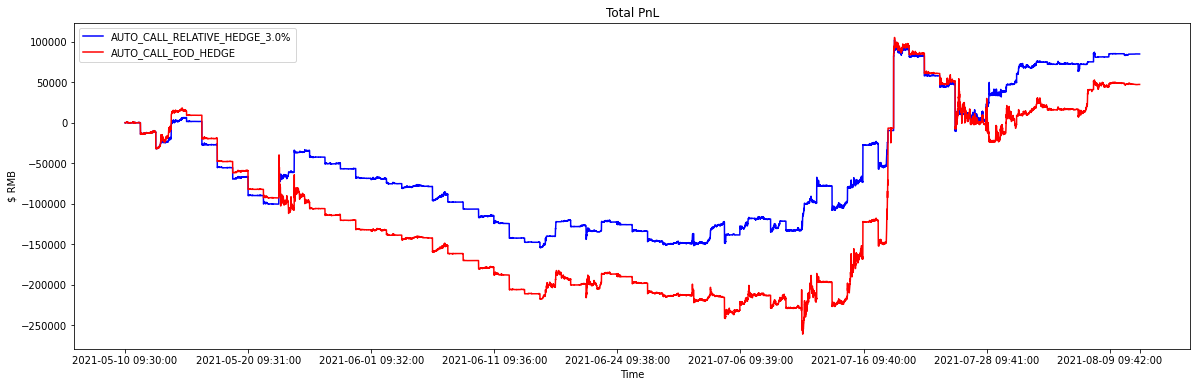

In [16]:
plt.figure(figsize=(20, 6))
plt.title("Total PnL")
plt.plot(ts, result1['Total Pnl'] ,'b', label = str(strategy1))
plt.plot(ts, result2['Total Pnl'] ,'r', label = str(strategy2))
#plt.plot(ts, result3[strategy3.tag_pv()], 'g', label = strategy3.tag_pv())
plt.xlabel("Time")
plt.ylabel("$ RMB")
plt.legend()
plt.xticks(xticks);